In [10]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

preview_link = 'https://raw.githubusercontent.com/Rafig77/data/main/cardio_train.csv'
df = pd.read_csv(preview_link, sep=';')# file_id = preview_link.split("/")[5]
# download_link = f"https://drive.google.com/uc?export=download&id={file_id}"

df.columns


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [11]:

# Connection info
# db_config = {
# 'host': 'localhost',
# 'user': 'root',
# 'password': '123456',
# 'database': 'proje2'
# }

# connection = mysql.connector.connect(**db_config)
# cursor = connection.cursor()
# import pandas as pd
# import mysql.connector

# preview_link = 'https://raw.githubusercontent.com/Rafig77/data/main/cardio_train.csv'
# df = pd.read_csv(preview_link, sep=';')

# # # CSV file path
# # csv_file = 'cardio_train - cardio_train.csv'

# # # convert csv to df
# # df = pd.read_csv(csv_file)

# # connection database
# connection = mysql.connector.connect(**db_config)
# cursor = connection.cursor()

# # create table
# create_table_query = """
# CREATE TABLE IF NOT EXISTS cardio_data (
#     id INT AUTO_INCREMENT PRIMARY KEY,
#     age INT,
#     gender INT,
#     height INT,
#     weight INT,
#     ap_hi INT,
#     ap_lo INT,
#     cholesterol INT,
#     gluc INT,
#     smoke INT,
#     alco INT,
#     active INT,
#     cardio INT
# )
# """
# cursor.execute(create_table_query)

# # import df to database
# for _, row in df.iterrows():
#     insert_query = """
#  INSERT INTO cardio_data (age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio)
# VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
# """
#     values = (
#         row['age'],
#         row['gender'],
#         row['height'],
#         row['weight'],
#         row['ap_hi'],
#         row['ap_lo'],
#         row['cholesterol'],
#         row['gluc'],
#         row['smoke'],
#         row['alco'],
#         row['active'],
#         row['cardio'],
#  )
#     cursor.execute(insert_query, values)


# connection.commit()
# cursor.close()
# connection.close()



In [12]:
'''
# Connection info
db_config = {
 'host': 'localhost',
 'user': 'root',
 'password': '123456',
 'database': 'proje2'
}

connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()
import pandas as pd
import mysql.connector


# CSV file path
csv_file = 'cardio_train - cardio_train.csv'

# convert csv to df
df = pd.read_csv(csv_file)

# connection database
connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()

# create table
create_table_query = """
CREATE TABLE IF NOT EXISTS cardio_data (
id INT AUTO_INCREMENT PRIMARY KEY,
age INT,
gender INT,
height INT,
weight INT,
ap_hi INT,
ap_lo INT,
cholesterol INT,
gluc INT,
smoke INT,
 alco INT,
 active INT,
 cardio INT
)
"""
cursor.execute(create_table_query)

# import df to database
for _, row in df.iterrows():
 insert_query = """
 INSERT INTO cardio_data (age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio)
 VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
 """
 values = (
 row['age'],
row['gender'],
row['height'],
 row['weight'],
 row['ap_hi'],
 row['ap_lo'],
row['chlesterol'],
row['gluc'],row['smoke'],
row['alco'],
row['active'],
 row['cardio'],
 )
cursor.execute(insert_query, values)


connection.commit()
cursor.close()
connection.close()
'''

'\n# Connection info\ndb_config = {\n \'host\': \'localhost\',\n \'user\': \'root\',\n \'password\': \'123456\',\n \'database\': \'proje2\'\n}\n\nconnection = mysql.connector.connect(**db_config)\ncursor = connection.cursor()\nimport pandas as pd\nimport mysql.connector\n\n\n# CSV file path\ncsv_file = \'cardio_train - cardio_train.csv\'\n\n# convert csv to df\ndf = pd.read_csv(csv_file)\n\n# connection database\nconnection = mysql.connector.connect(**db_config)\ncursor = connection.cursor()\n\n# create table\ncreate_table_query = """\nCREATE TABLE IF NOT EXISTS cardio_data (\nid INT AUTO_INCREMENT PRIMARY KEY,\nage INT,\ngender INT,\nheight INT,\nweight INT,\nap_hi INT,\nap_lo INT,\ncholesterol INT,\ngluc INT,\nsmoke INT,\n alco INT,\n active INT,\n cardio INT\n)\n"""\ncursor.execute(create_table_query)\n\n# import df to database\nfor _, row in df.iterrows():\n insert_query = """\n INSERT INTO cardio_data (age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, acti

### Data understanding

In [13]:
# Checking null values
df.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [14]:
# Getting information about dataset
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Data preparetion

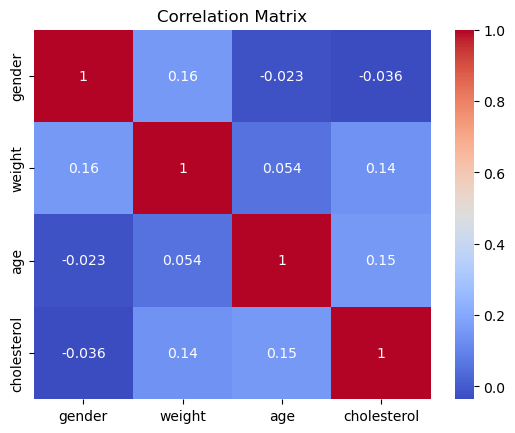

In [16]:
### Visualizing
correlation_matrix = df[['gender', 'weight', 'age','cholesterol']].corr()

# Heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Converting days to years
df['age_years']=round((df['age']/365.25), 0)

# Replacing 2 with 0
df['gender']=df['gender'].replace(2,0)
df.dropna(inplace=True)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,0,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,17623,0,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0


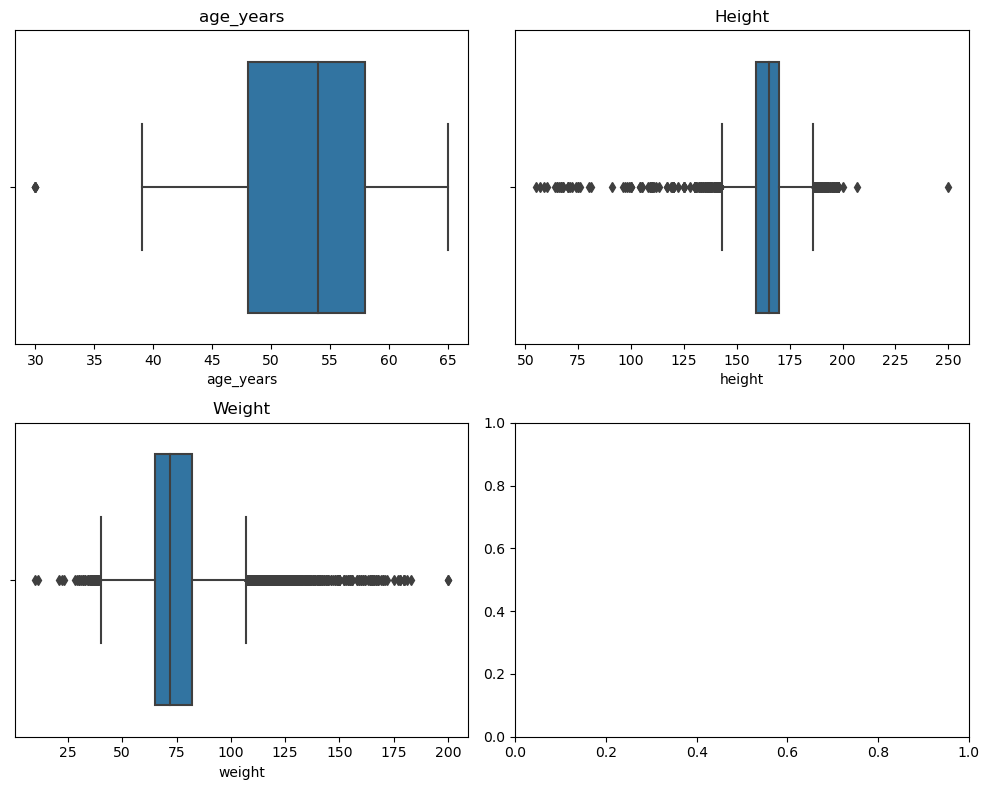

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Box plot for 'age'
sns.boxplot(x='age_years', data=df, ax=axes[0, 0])
axes[0, 0].set_title('age_years')
 
# Box plot for 'height'
sns.boxplot(x='height', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Height')

# Box plot for 'weight'
sns.boxplot(x='weight', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Weight')

 
# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#### Creating method for outliners

In [19]:
# Function to drop outliers in the 'height' column using custom approach
def drop_outliers_custom(dataframe, column_name, lower_threshold, upper_threshold):
    # Filter the DataFrame to keep only the data points within the specified range
    dataframe_filtered = dataframe[(dataframe[column_name] >= lower_threshold) & (dataframe[column_name] <= upper_threshold)]
    return dataframe_filtered
 

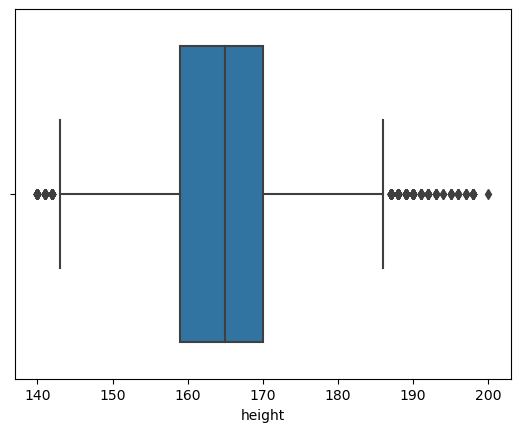

In [20]:
# Drop outliers from the 'height' column using the drop_outliers_custom function
df_filtered = drop_outliers_custom(df, 'height', 140, 200)
sns.boxplot(x='height', data=df_filtered)
plt.show() 

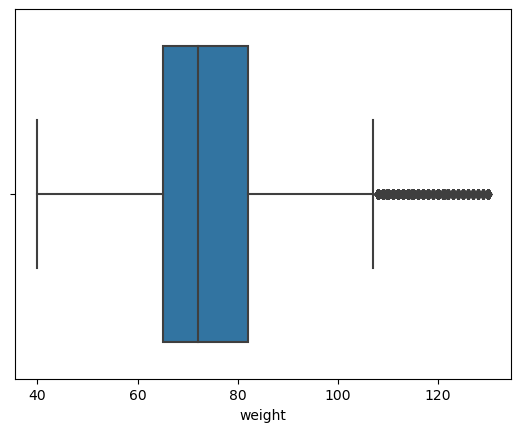

In [21]:
# Drop outliers from the 'weight' column using the drop_outliers_custom function
df_filtered = drop_outliers_custom(df, 'weight', 40, 130)
sns.boxplot(x='weight', data=df_filtered)
plt.show()


In [22]:
# Convert height and weight to numeric data types
df_filtered['height'] = df_filtered['height'].astype(float)
df_filtered['weight'] = df_filtered['weight'].astype(float)

# Convert height from cm to meters (BMI formula requires height in meters)
df_filtered['height'] /= 100

# Calculate BMI and create a new 'bmi' column
df_filtered['bmi'] = df_filtered['weight'] / (df_filtered['height'] ** 2)
df_filtered['bmi']=round(df_filtered['bmi'],1)

print(df_filtered['bmi'])

0        22.0
1        34.9
2        23.5
3        28.7
4        23.0
         ... 
69995    26.9
69996    50.5
69997    31.4
69998    27.1
69999    24.9
Name: bmi, Length: 69746, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_16092\2421185179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['height'] = df_filtered['height'].astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_16092\2421185179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['weight'] = df_filtered['weight'].astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_16092\2421185179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [23]:
#  the pulse pressure, the difference between the systolic (ap_hi) and diastolic (ap_lo) blood pressure values
df_filtered['pulse_pressure'] = df_filtered['ap_hi'] - df_filtered['ap_lo']
df_filtered['age_category'] = pd.cut(df_filtered['age_years'], bins=[0, 30, 60, 150], labels=['young', 'middle-aged', 'elderly'])
df_filtered['bmi_category'] = pd.cut(df_filtered['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['underweight', 'normal', 'overweight', 'obese'])

# # Display the resulting DataFrame with the new 'pulse_pressure' column
df_filtered['age_category']


C:\Users\User\AppData\Local\Temp\ipykernel_16092\1127919368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pulse_pressure'] = df_filtered['ap_hi'] - df_filtered['ap_lo']
C:\Users\User\AppData\Local\Temp\ipykernel_16092\1127919368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_category'] = pd.cut(df_filtered['age_years'], bins=[0, 30, 60, 150], labels=['young', 'middle-aged', 'elderly'])
C:\Users\User\AppData\Local\Temp\ipykernel_16092\1127919368.py:4: SettingWithCopyW

0        middle-aged
1        middle-aged
2        middle-aged
3        middle-aged
4        middle-aged
            ...     
69995    middle-aged
69996        elderly
69997    middle-aged
69998        elderly
69999    middle-aged
Name: age_category, Length: 69746, dtype: category
Categories (3, object): ['young' < 'middle-aged' < 'elderly']

In [24]:
# One-Hot Encoding for categorical features
categorical_features = ['age_category', 'bmi_category']
encoder = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(encoder.fit_transform(df_filtered[categorical_features]), columns=encoder.get_feature_names_out (categorical_features))

# Combine the encoded features with the original DataFrame
data_encoded = pd.concat([df_filtered, encoded_features], axis=1)
data_encoded.columns
df_filtered['cardio'].isna().sum
# Interaction Terms and Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True)
interaction_features = pd.DataFrame(poly.fit_transform(df_filtered[['age_years', 'pulse_pressure']]), columns=poly.get_feature_names_out (['age_years', 'pulse_pressure']))
data_encoded = pd.concat([data_encoded, interaction_features], axis=1)
data_encoded.columns



d:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'pulse_pressure', 'age_category', 'bmi_category',
       'age_category_elderly', 'age_category_middle-aged',
       'age_category_young', 'bmi_category_normal', 'bmi_category_obese',
       'bmi_category_overweight', 'bmi_category_underweight',
       'bmi_category_nan', '1', 'age_years', 'pulse_pressure',
       'age_years pulse_pressure'],
      dtype='object')

In [25]:

# Feature Scaling - Scale 'age_years', 'bmi', and 'pulse_pressure'
scaler = StandardScaler()
data_encoded["age_years_pulse_pressure"]=data_encoded["age_years pulse_pressure"]
data_encoded[["age_years_pulse_pressure"]] = scaler.fit_transform(data_encoded[['age_years_pulse_pressure']])
data_encoded[["age_years_pulse_pressure"]]=round(data_encoded[["age_years_pulse_pressure"]],2)

In [26]:
# Deleting unnecassary features

del data_encoded['id']
del data_encoded['age']

del data_encoded['age_years pulse_pressure']

data_encoded = data_encoded.dropna(subset=['cardio'])
data_encoded['cardio'].isna().sum()

0

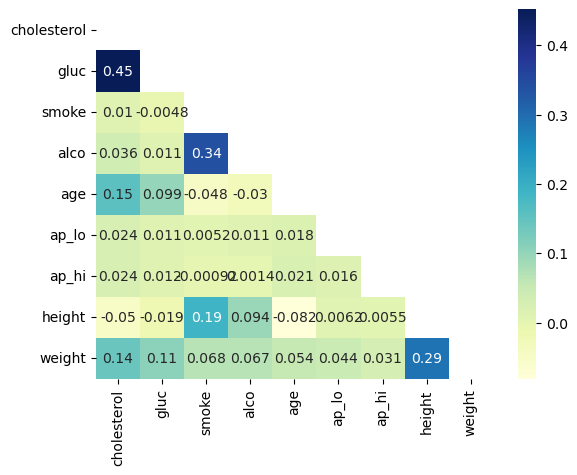

In [27]:
import numpy as np
selected_features = ['cholesterol', 'gluc', 'smoke', 'alco',"age","ap_lo","ap_hi","height",'weight']
mask = np.triu(np.ones_like(df[selected_features].corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df[selected_features].corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

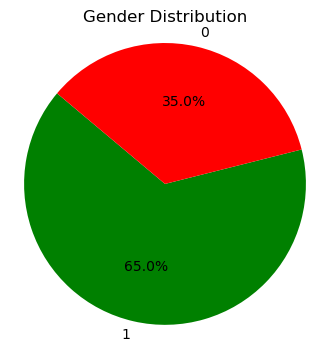

In [28]:
# Step 3: Visualize the Gender Data
gender_counts = df['gender'].value_counts()

# Plotting the gender distribution
plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'orange'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

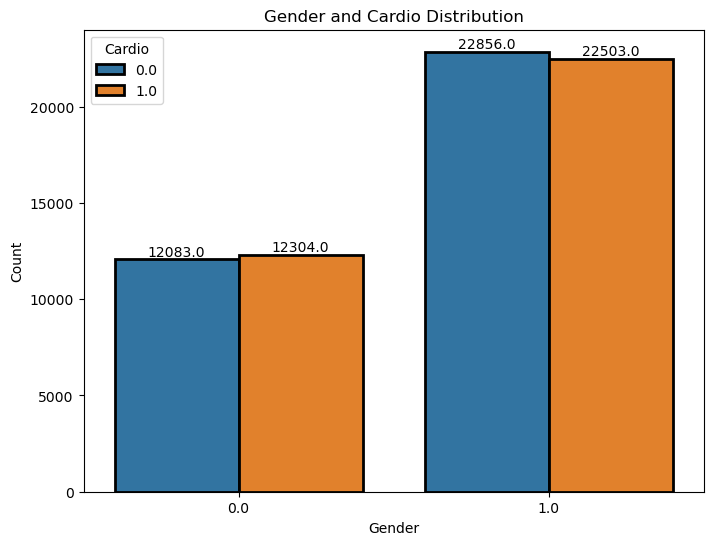

In [29]:
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', hue='cardio', data=data_encoded, linewidth=2, edgecolor='black')
plt.title('Gender and Cardio Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cardio')

# Display exact count numbers on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')


plt.show()

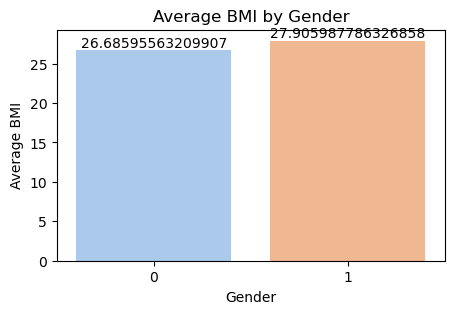

In [30]:

# Step 3: Visualize the Gender and BMI Data
gender_bmi_avg = df_filtered.groupby('gender')['bmi'].mean().reset_index()

plt.figure(figsize=(5,3))
ax=sns.barplot(x='gender', y='bmi', data=gender_bmi_avg, palette='pastel')
plt.title('Average BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('Average BMI')
# Display exact count numbers on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')


plt.show()

In [31]:
keyword = "normal"

# Method: Using apply() with str.contains()
columns_with_keyword = data_encoded.apply(lambda x: x.astype(str).str.contains(keyword, case=False)).any()

# Step 3: Get the column names containing the keyword "normal"
columns_containing_keyword = data_encoded.columns[columns_with_keyword].tolist()

# Step 4: Print the column names containing the keyword "normal"
print("Columns containing the keyword 'normal':")
print(columns_containing_keyword)
 

Columns containing the keyword 'normal':
['bmi_category']


In [32]:
data_encoded=data_encoded.dropna()

### Modelling

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
# Step 2: Split the data into features (X) and target (y)
X = data_encoded.drop(['cardio','age_category','bmi_category'], axis=1)
y = data_encoded['cardio']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 5: Create the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Step 6: Create the GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Step 7: Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 8: Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Step 9: Use the best estimator from GridSearchCV
best_rf_classifier = grid_search.best_estimator_

# Step 10: Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test)

# Step 11: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 12: Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 13: Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title("Confusion Matrix ")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Fitting 5 folds for each of 81 candidates, totalling 405 fits


Accuracy: 0.6271320618927672

Confusion Matrix:
[[4404 2645]
 [2536 4310]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.62      0.63      7049
         1.0       0.62      0.63      0.62      6846

    accuracy                           0.63     13895
   macro avg       0.63      0.63      0.63     13895
weighted avg       0.63      0.63      0.63     13895



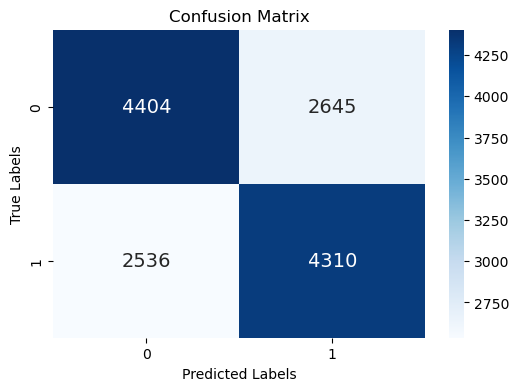

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Prepare the features and target
X = data_encoded.drop(['cardio', 'age_category', 'bmi_category'], axis=1)
y = data_encoded['cardio']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Step 5: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 6: Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Step 7: Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy: 0.7371716444764304

Confusion Matrix:
[[5449 1600]
 [2052 4794]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75      7049
         1.0       0.75      0.70      0.72      6846

    accuracy                           0.74     13895
   macro avg       0.74      0.74      0.74     13895
weighted avg       0.74      0.74      0.74     13895



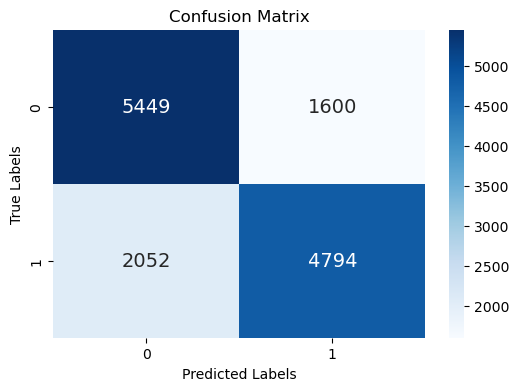

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Prepare the features and target
X = data_encoded.drop(['cardio', 'age_category', 'bmi_category'], axis=1)
y = data_encoded['cardio']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Step 6: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 7: Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Step 8: Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()